In [1]:
import tensorflow as tf
from tensorflow import keras

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
tf.__version__

'2.12.0'

In [3]:
keras.__version__

'2.12.0'

# CLASSIFICATION

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_f, y_train_f), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_f.shape, X_train_f.dtype

((60000, 28, 28), dtype('uint8'))

In [6]:
X_val, X_train = X_train_f[:5000]/255.0, X_train_f[5000:]/255.0
y_val, y_train = y_train_f[:5000], y_train_f[5000:]

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_names[y_train[0]]

'Coat'

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.layers

In [12]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [13]:
model.get_layer('dense') is hidden1

True

In [14]:
weights, biases = hidden1.get_weights()
weights, biases

(array([[ 0.06199579, -0.01563698, -0.00181118, ...,  0.01032015,
          0.05028648, -0.02429073],
        [ 0.05399124, -0.0276812 ,  0.03755393, ..., -0.03145181,
          0.02019031, -0.05588567],
        [ 0.04213941, -0.06485847, -0.05701099, ...,  0.01707845,
         -0.00428931,  0.04272941],
        ...,
        [ 0.01007944,  0.02951667,  0.00174522, ...,  0.06573454,
         -0.0651469 , -0.05790098],
        [ 0.00225794,  0.00921588, -0.04556218, ..., -0.00037952,
         -0.02893482,  0.02069069],
        [-0.02677125, -0.06423278,  0.05173807, ..., -0.01423633,
          0.03783954, -0.0103883 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [15]:
weights.shape, biases.shape

((784, 300), (300,))

In [16]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='sgd',  # learning rate defaults to 0.01
              metrics=['accuracy'])

# The above code is also equivalent to the code below:
# model.compile(loss=keras.losses.sparse_categorical_crossentropy, 
#              optimizer=keras.optimizers.SGD(),  # learning rate can be set explicitly using optimizer=keras.optimizers.SGD(lr=0.1)
#              metrics=[keras.metrics.sparse_categorical_accuracy])

In [17]:
hist = model.fit(X_train, y_train, epochs=30,
                 validation_data=(X_val,y_val))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6992 - accuracy: 0.7707 - val_loss: 0.5288 - val_accuracy: 0.8128
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4870 - accuracy: 0.8311 - val_loss: 0.4403 - val_accuracy: 0.8560
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4439 - accuracy: 0.8465 - val_loss: 0.4276 - val_accuracy: 0.8582
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4176 - accuracy: 0.8559 - val_loss: 0.3970 - val_accuracy: 0.8630
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3977 - accuracy: 0.8628 - val_loss: 0.3810 - val_accuracy: 0.8700
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3812 - accuracy: 0.8669 - val_loss: 0.3715 - val_accuracy: 0.8718
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3679 - accuracy: 0.8718 - val_loss: 0.3981 - val_accuracy:

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

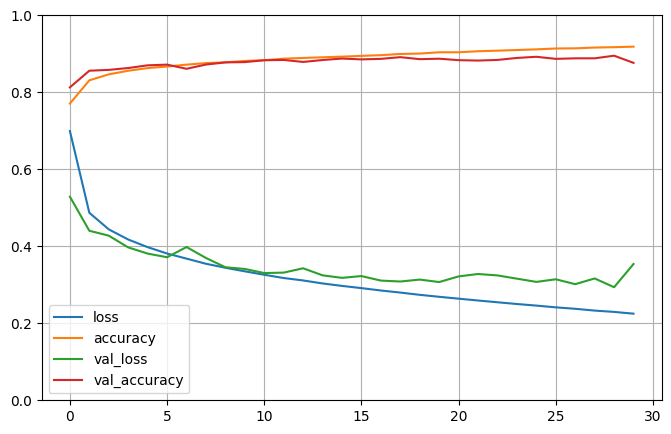

In [19]:
pd.DataFrame(hist.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [20]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 79.2210 - accuracy: 0.8388


[79.22099304199219, 0.8388000130653381]

In [21]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 92ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [22]:
y_pred = np.argmax(y_proba, axis=1)
# y_pred = (model.predict(x_test) > 0.5).astype("int32")
y_pred

array([9, 2, 1])

In [23]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [24]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

_________
_________

# REGRESSION

In [39]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [40]:
housing = fetch_california_housing()

In [42]:
X_train_f, X_test, y_train_f, y_test = train_test_split(housing.data, housing.target)
X_train, X_val, y_train, y_val = train_test_split(X_train_f, y_train_f)

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Using the Sequential API

In [45]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error', 
             optimizer='sgd')
hist = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 5ms/step - loss: 0.8797 - val_loss: 0.9539
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5256 - val_loss: 0.6834
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.7080 - val_loss: 0.5943
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5058 - val_loss: 0.4499
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4228 - val_loss: 0.4341
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4172 - val_loss: 0.4213
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4044 - val_loss: 0.4164
Epoch 8/20
363/363 [==============================] - 2s 6ms/step - loss: 0.3985 - val_loss: 0.4103
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4002 - val_loss: 0.4145
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3983 - val_loss: 0.4056

In [46]:
y_new = y_test[:3]
y_new, y_pred

(array([1.844, 3.623, 2.01 ]),
 array([[2.4121268],
        [3.4609544],
        [2.8726707]], dtype=float32))

____________

## Functional API
A wide and deep network -> It connects all parts of the inputs directly to the output layer as well as passing them through the dense layers. This architecture makes it possible for the neural network to learn both deep patterns and simple rules.

In [50]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model2 = keras.Model(inputs=[input_], outputs=[output])

In [53]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 30)           930         ['dense_5[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_6[0][0]']            

### What if we want to send a subset of the features through the wide path and a different subset (possibly overlapping) through the deep path?
In this case, one solution is to use multiple inputs. For example, suppose we want to send five features through the wide path (features 0 to 4), and six features through the deep path (features 2 to 7):

In [51]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model3 = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [52]:
model3.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_8 (Dense)                (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 30)           930         ['dense_8[0][0]']                
                                                                                            

In [56]:
model3.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_val_A, X_val_B = X_val[:, :5], X_val[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model3.fit((X_train_A, X_train_B), y_train, 
                    epochs=20, 
                    validation_data=((X_val_A, X_val_B), y_val))

mse_test = model3.evaluate((X_test_A, X_test_B), y_test)
y_pred = model3.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.3967 - val_loss: 0.5343
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5009 - val_loss: 0.4652
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4306 - val_loss: 0.4359
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4406 - val_loss: 0.4353
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4138 - val_loss: 0.4306
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4039 - val_loss: 0.4102
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4001 - val_loss: 0.4070
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3963 - val_loss: 0.4078
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4058 - val_loss: 0.4169
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3833 - val_loss: 0.3934

--------------------------

# Subclassing API
To build Dynamic Models

In [58]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs) # handles standard args (eg. name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_ouput = self.aux_output(hidden2)
        return main_output, aux_output
    
model4 = WideAndDeepModel()

In [62]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 30)           930         ['dense_5[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_6[0][0]']            

### Saving the model
Keras will use the HDF5 format to save both the model's architecture (including every layer's hyperparameters) and teh values of all the model parameters for every layer. It also saves the optimizer (including its hyperparameters and any state it may have)

In [65]:
model2.save('temp_model2.h5')

In [68]:
model, model2, model3, model4

(<keras.engine.sequential.Sequential at 0x795a9c7e8130>,
 <__main__.WideAndDeepModel at 0x795f17791030>)

### Loading the model

In [70]:
model5 = keras.models.load_model('/kaggle/working/temp_model2.h5')

In [71]:
model2, model5

(<keras.engine.functional.Functional at 0x795f1b2bcca0>,
 <keras.engine.functional.Functional at 0x795f1b476c80>)

In [72]:
model5.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 30)           930         ['dense_5[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_6[0][0]']            

_____

## Using Callbacks
It is quite common for models training on large datasets for training to last several hours. In this case, you should not only save your model at the end of training, but also save checkpoints at regular intervals during training, to avoid losing everything if your computer crashes. And to do this we use `callbacks`

In [74]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('/kaggle/working/temp_model2.h5')
hist = model2.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('/kaggle/working/temp_model2.h5',
                                               save_best_only=True)
hist = model.fit(X_train, y_train, epochs=10,
                validation_data=(X_val, y_val),
                callbacks=[checkpoint_cb])
model = keras.models.load_model('/kaggle/working/temp_model2.h5')

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                 restore_best_weights=True)
hist = model.fit(X_train, y_train, epochs=100,
                validation_data=(X_val, y_val),
                callbacks=[checkpoint_cb, early_stopping_cb])

In [75]:
# Custom Callback
class PrintValTrainRationCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print('\nval/train: {:.2f}'.format(logs['val_loss']/logs['loss']))

In [25]:
import os
root_logdir = os.path.join(os.curdir, 'my_logs')

In [26]:
def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

In [27]:
run_logdir = get_run_logdir()

In [28]:
run_logdir

'./my_logs/run_2023_09_08-14_25_23'

In [29]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
hist = model.fit(X_train, y_train, epochs=30,
                validation_data=(X_val, y_val),
                callbacks=[tensorboard_cb])

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2217 - accuracy: 0.9212 - val_loss: 0.2952 - val_accuracy: 0.8962
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2177 - accuracy: 0.9213 - val_loss: 0.3119 - val_accuracy: 0.8898
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2145 - accuracy: 0.9236 - val_loss: 0.2964 - val_accuracy: 0.8954
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2112 - accuracy: 0.9239 - val_loss: 0.2998 - val_accuracy: 0.8956
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2071 - accuracy: 0.9267 - val_loss: 0.2896 - val_accuracy: 0.8934
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2049 - accuracy: 0.9265 - val_loss: 0.2927 - val_accuracy: 0.8930
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2003 - accuracy: 0.9289 - val_loss: 0.2959 - val_accuracy:

In [30]:
%load_ext tensorboard

In [31]:
%tensorboard --logdir=./my_logs --port=6006

In [34]:
tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 5444), started 0:00:48 ago. (Use '!kill 5444' to kill it.)

In [35]:
!kill 5444